In [53]:
import numpy as np
import tensorflow as tf
import npzviewer
import pandas as pd
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture       
from sklearn.metrics import silhouette_score
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
import sklearn.cluster
from numpy import quantile, where, random
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# loading dataset

In [54]:
data=np.load('pca_dataset.npz')

datas = dict(data)

In [55]:
x=datas.items()


THE DATASET IS THE ZIPPED DATASET THAT HAS X AND Y, WHERE X has (10000, 1000) number of features and Y has (10000, 1) features so basically Y is the target variable and X are the data that has to be put to make prediction or classification depending on problem 

In [56]:
df1 = pd.DataFrame.from_dict(data['X'])
df1.shape

(10000, 1000)

In [57]:
df2 = pd.DataFrame.from_dict(data['y'])
dff_nonPCA=df1+df2
dff_nonPCA.shape

(10000, 1000)

In [58]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.070638,0.248065,-0.035548,0.019868,0.121784,0.088588,0.067787,0.073847,-0.045270,0.101533,...,0.068207,0.124163,0.105386,0.003199,-0.003017,0.111522,0.012598,-0.014785,-0.032381,0.001247
1,0.198926,-0.129163,0.075608,0.092949,0.032929,-0.019126,0.029402,-0.077355,-0.037286,-0.010184,...,0.001971,0.030175,-0.019699,0.046723,-0.034210,0.026688,-0.059631,0.082648,0.130478,0.088292
2,-0.364856,0.121607,-0.116126,-0.162898,-0.105788,-0.003508,-0.079141,0.105168,0.077759,-0.021008,...,-0.031173,-0.100468,-0.007412,-0.079695,0.059069,-0.089595,0.095951,-0.133882,-0.207384,-0.148253
3,-0.183019,0.441945,-0.141465,-0.100082,0.089864,0.120502,0.035673,0.182631,0.001480,0.121604,...,0.073051,0.100782,0.145500,-0.055864,0.043533,0.087394,0.088906,-0.125595,-0.207049,-0.113564
4,0.145064,0.002066,0.035712,0.063190,0.060643,0.017457,0.042202,-0.025466,-0.038429,0.026197,...,0.022743,0.059810,0.022953,0.031492,-0.022094,0.052066,-0.031683,0.046104,0.069221,0.053844


In [59]:
df2.shape

(10000, 1)

# #train random forest on this dataset +use time.time and discuss performance using metrics


In [60]:
#train random forest on this dataset +use time.time and discuss performance using metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time


In [61]:
clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(
    df1, df2, test_size=0.33, random_state=42)

In [62]:
start = time.time()

clf.fit(X_train, y_train.values.ravel())
stop = time.time()
print(f"Training time: {stop - start}s")


Training time: 4.265623331069946s


In [63]:
clf.score(X_test,y_test.values.ravel())

0.9993939393939394

# evaluation of random forest

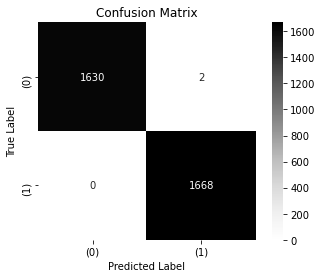

In [64]:
y_pred = clf.predict(X_test)
y_test = y_test
conf_mat = confusion_matrix(y_test, y_pred)
lang = ['(0)', '(1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greys', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [65]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)
print(":random forest")
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)
print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative))
print("Accuracy:", accuracy)

:random forest
True Positives: 1668
True Negatives: 1630
False Positives: 2
False Negatives: 0
Precision: 0.9988023952095808
Recall: 1.0
Accuracy: 0.9993939393939394


In [66]:
#describe tre structure in terms of depth and trees of the forest

In [67]:
dff1= df1
dff2=df2

In [68]:
dff1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.070638,0.248065,-0.035548,0.019868,0.121784,0.088588,0.067787,0.073847,-0.045270,0.101533,...,0.068207,0.124163,0.105386,0.003199,-0.003017,0.111522,0.012598,-0.014785,-0.032381,0.001247
1,0.198926,-0.129163,0.075608,0.092949,0.032929,-0.019126,0.029402,-0.077355,-0.037286,-0.010184,...,0.001971,0.030175,-0.019699,0.046723,-0.034210,0.026688,-0.059631,0.082648,0.130478,0.088292
2,-0.364856,0.121607,-0.116126,-0.162898,-0.105788,-0.003508,-0.079141,0.105168,0.077759,-0.021008,...,-0.031173,-0.100468,-0.007412,-0.079695,0.059069,-0.089595,0.095951,-0.133882,-0.207384,-0.148253
3,-0.183019,0.441945,-0.141465,-0.100082,0.089864,0.120502,0.035673,0.182631,0.001480,0.121604,...,0.073051,0.100782,0.145500,-0.055864,0.043533,0.087394,0.088906,-0.125595,-0.207049,-0.113564
4,0.145064,0.002066,0.035712,0.063190,0.060643,0.017457,0.042202,-0.025466,-0.038429,0.026197,...,0.022743,0.059810,0.022953,0.031492,-0.022094,0.052066,-0.031683,0.046104,0.069221,0.053844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.144420,0.038950,0.026891,0.059616,0.074442,0.027699,0.048727,-0.011605,-0.038821,0.039707,...,0.031059,0.073708,0.036723,0.029235,-0.020157,0.065664,-0.027842,0.038671,0.059887,0.050214
9996,-0.292850,0.287663,-0.132878,-0.139532,-0.013231,0.059654,-0.024979,0.149122,0.043239,0.048044,...,0.019745,-0.006685,0.067874,-0.071648,0.053083,-0.006606,0.097972,-0.135736,-0.219305,-0.136900
9997,0.416880,-0.150274,0.132840,0.186457,0.115982,0.001055,0.086696,-0.123265,-0.090391,0.020624,...,0.030715,0.110091,0.002697,0.092571,-0.066632,0.098999,-0.111227,0.153638,0.241585,0.170555
9998,-0.389854,0.251048,-0.150073,-0.179135,-0.067698,0.035759,-0.060678,0.153025,0.074121,0.018477,...,-0.003152,-0.061297,0.040043,-0.088222,0.066283,-0.053105,0.116205,-0.160569,-0.256109,-0.171608


# PCA

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [70]:
scaler = StandardScaler()
start = time.time()

x = scaler.fit_transform(dff1)
pcas = PCA(.95)
principalComponents = pcas.fit_transform(x) # << to retain the components in an object
stop = time.time()

print(f"Training time: {stop - start}s")

Training time: 1.8660337924957275s


In [71]:
pDF=pd.DataFrame(data = principalComponents)

In [72]:
pDF.head()
pDF.shape

(10000, 2)

In [73]:
print ( "Components = ", pcas.n_components_ , ";\nTotal explained variance = ",
      round(pcas.explained_variance_ratio_.sum(),100)  )

Components =  2 ;
Total explained variance =  0.9993822766462844


# random forest after PCA

In [74]:
clf2 = RandomForestClassifier(n_estimators=50)
X_train, X_test, y_train, y_test = train_test_split(
    pDF, dff2, test_size=0.33, random_state=42)

In [75]:
start = time.time()

clf2.fit(X_train, y_train.values.ravel())
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.19747161865234375s


In [76]:
#now again train dataset on PCA
clf2.score(X_test,y_test.values.ravel())

0.9984848484848485

# evaluation of random foprest after PCA

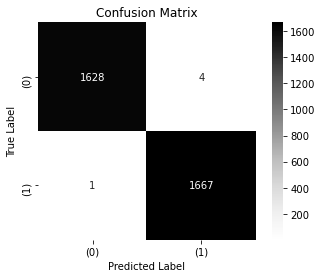

In [77]:
y_pred = clf2.predict(X_test)
y_test = y_test
conf_mat = confusion_matrix(y_test, y_pred)
lang = ['(0)', '(1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greys', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
gima=pd.DataFrame(X_train)

In [78]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)
print("Random forest")
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)
print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative))
print("Accuracy:", accuracy)

Random forest
True Positives: 1667
True Negatives: 1628
False Positives: 4
False Negatives: 1
Precision: 0.997606223818073
Recall: 0.999400479616307
Accuracy: 0.9984848484848485


# tree visualization with PCA at 0 index(estimator)


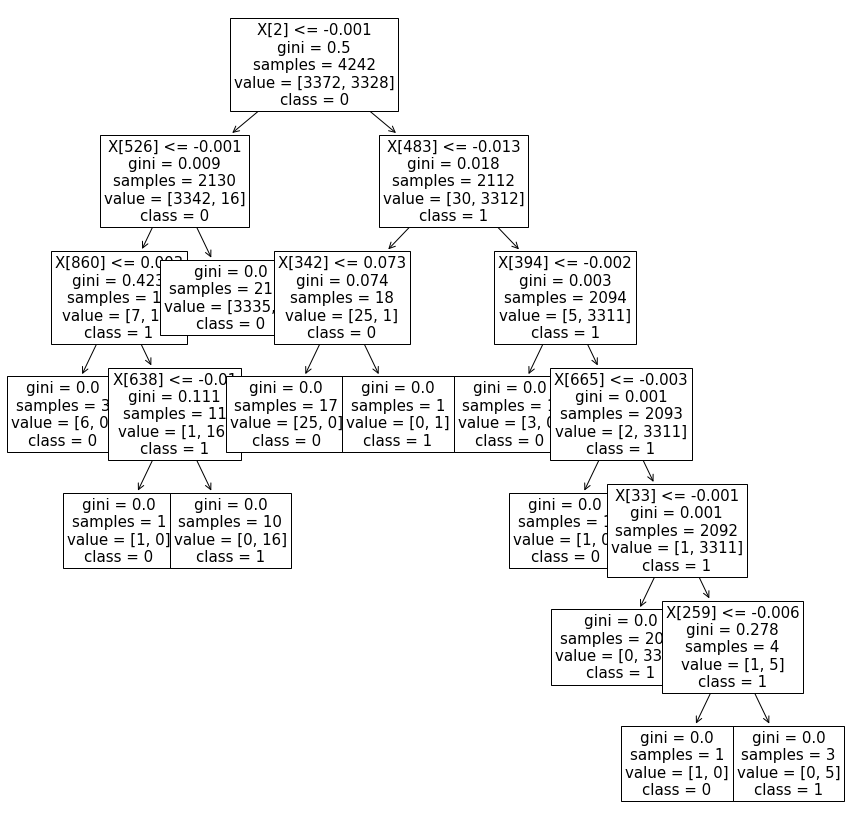

In [79]:
#tree visualization with PCA at 0 index(estimator)

tree = clf.estimators_[0]
logo=['0','1']
plt.figure(figsize=(15,15))
a = plot_tree(tree, class_names=logo, fontsize=15)
plt.show()
#depth of tree = 5
#leafs =9

# tree visualization with PCA at 1 index(estimator)


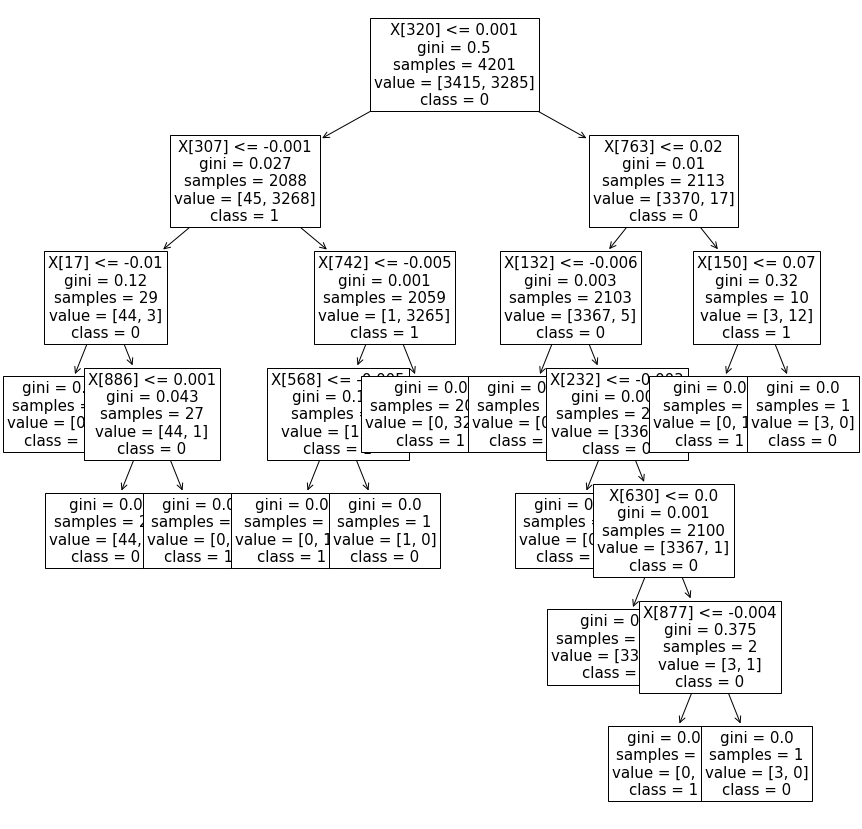

In [80]:
#tree visualization with PCA at 1 index(estimator)


tree = clf.estimators_[1]
logo=['0','1']
plt.figure(figsize=(15,15))
a = plot_tree(tree, class_names=logo, fontsize=15)
plt.show()
#depth of tree = 5
#leafs =9

# #tree visualization without PCA


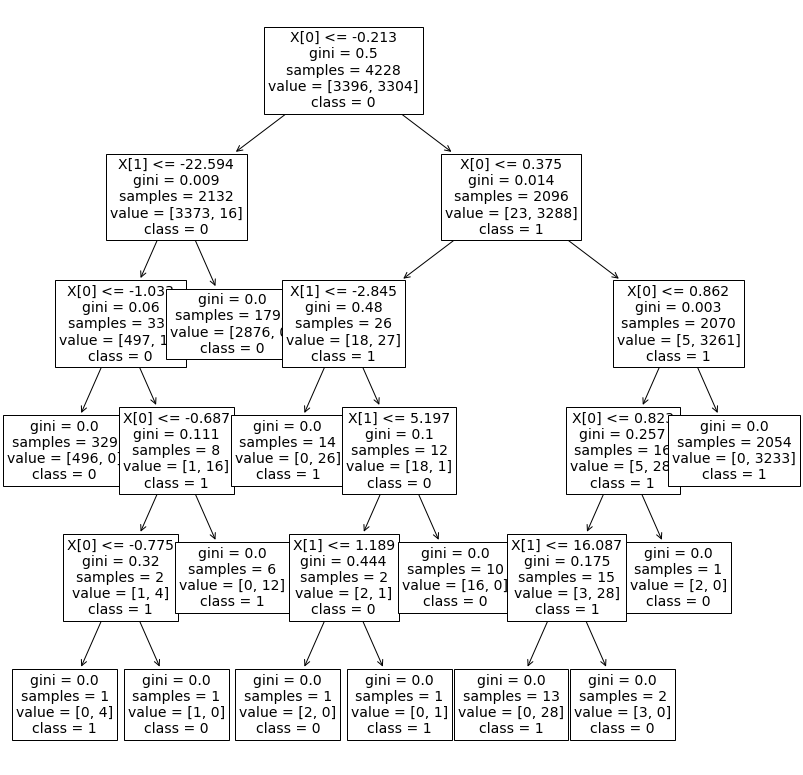

In [81]:
#tree visualization without PCA


tree = clf2.estimators_[0]
logo=['0','1']
plt.figure(figsize=(14,14))
b = plot_tree(tree, class_names=logo, fontsize=14)
plt.show()

# tree visualization without PCA at 1 index(estimator)


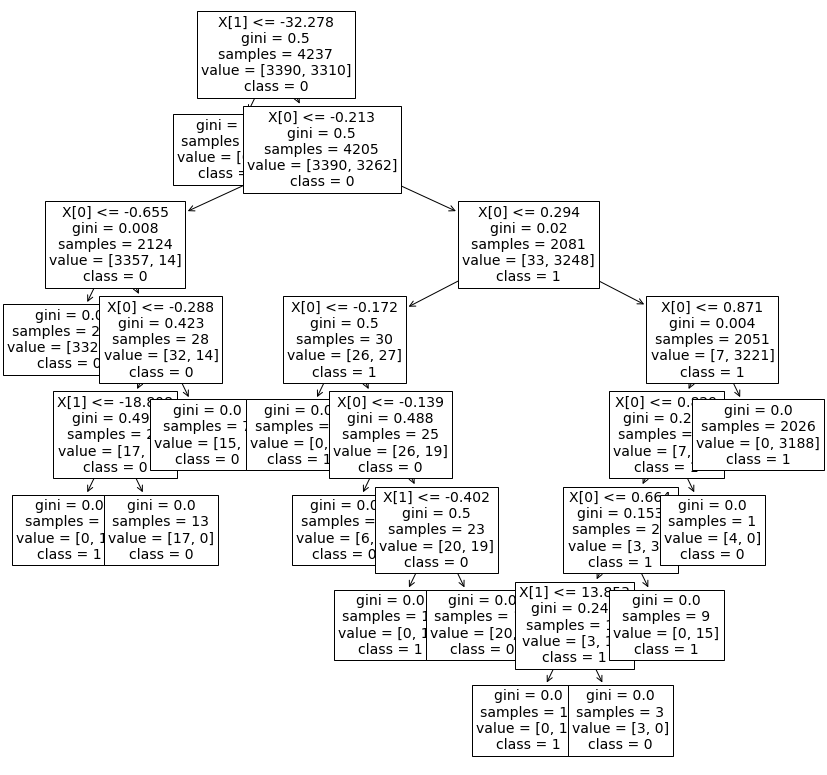

In [82]:
#tree visualization without PCA at 1 index(estimator)


tree = clf2.estimators_[1]
logo=['0','1']
plt.figure(figsize=(14,14))
b = plot_tree(tree, class_names=logo, fontsize=14)
plt.show()

# comparing old and new datsets 


old dataset= 1000 columns  + target variable



new dataset= 4 columns + target variable





compare time required for the dataset:

the time difference from two datasets PCA vs Non_PCA is training time that is near 4 seconds

Before PCA we can see that number of features(used for making decisions) are more(used in RandomForest) and after PCA the number of features used for maing decision are reduced even further and we can also notice that the detpth of the tree is more in the tree withouth PCA because of its higher dimensionality. 

Random forests are an ensemble machine learning algorithm that uses multiple decision trees to vote on the most common classification
Random forests aim to address the issue of overfitting that a single tree may exhibit
Random forests require all data to be numeric and non-missing
They can generally be more accurate, though also more memory-consuming than single decision trees

# for more doucumentation please check documentation